In [159]:
import pandas as pd
df=pd.read_csv("/Users/karthiatmakuru/Desktop/Breast_cancer/train.csv")
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis
0,869691,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,0.2678,...,91.93,591.7,0.1385,0.4092,0.45040,0.18650,0.5774,0.10300,NaN,M
1,898677,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488,NaN,B
2,852973,15.30,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,...,149.30,1269.0,0.1641,0.6110,0.63350,0.20240,0.4027,0.09876,NaN,M
3,914580,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,...,92.82,607.3,0.1276,0.2506,0.20280,0.10530,0.3035,0.07661,NaN,B
4,886776,15.32,17.27,103.20,713.3,0.13350,0.22840,0.24480,0.12420,0.2398,...,119.80,928.8,0.1765,0.4503,0.44290,0.22290,0.3258,0.11910,NaN,M


In [161]:
df.isnull().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                398
diagnosi

In [163]:
df=df.drop(columns=["Unnamed: 32"])

In [165]:
df.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [167]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [169]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [171]:
df["diagnosis"]

0      1
1      0
2      1
3      0
4      1
      ..
393    0
394    0
395    1
396    1
397    0
Name: diagnosis, Length: 398, dtype: int64

In [173]:
df['diagnosis'].unique()

array([1, 0])

In [175]:
#Features and Target
X=df.drop("diagnosis",axis=1)
y=df["diagnosis"]

In [177]:
#splitting the Dataset 
from sklearn.model_selection import train_test_split
X_train, X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=42)

In [179]:
from sklearn.linear_model import LogisticRegression
Model=LogisticRegression(max_iter=5000)
Model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [181]:
y_pred=Model.predict(X_valid)

In [183]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(y_valid,y_pred))
print(classification_report(y_valid,y_pred))


0.925
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        57
           1       0.87      0.87      0.87        23

    accuracy                           0.93        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.93      0.93      0.93        80



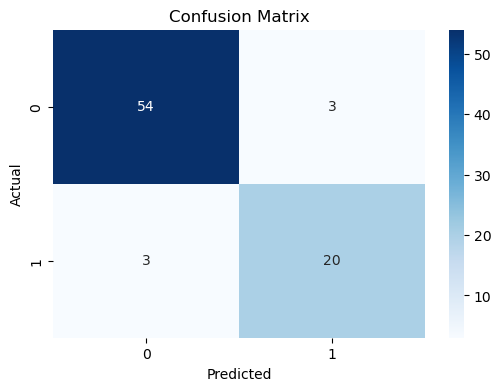

In [185]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_valid,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [187]:
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [189]:
y_pred=rf_model.predict(X_valid)

In [191]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(y_valid,y_pred))
print(classification_report(y_valid,y_pred))

0.95
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        57
           1       0.95      0.87      0.91        23

    accuracy                           0.95        80
   macro avg       0.95      0.93      0.94        80
weighted avg       0.95      0.95      0.95        80



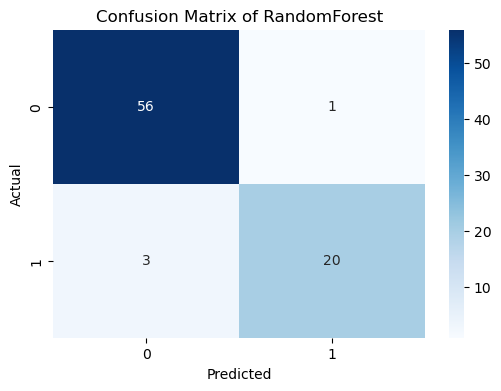

In [193]:
cm2=confusion_matrix(y_valid,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of RandomForest')
plt.show()

In [195]:
from xgboost import XGBClassifier
xgb=XGBClassifier(eval_metric='logloss',random_state=42)
xgb.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [197]:
y_pred=xgb.predict(X_valid)

In [199]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(y_valid,y_pred))
print(classification_report(y_valid,y_pred))

0.975
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        57
           1       0.96      0.96      0.96        23

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



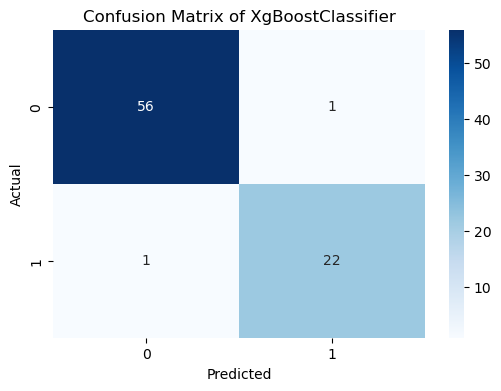

In [201]:
cm3=confusion_matrix(y_valid,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of XgBoostClassifier')
plt.show()